In [13]:
from web3 import Web3
import pprint as pp

In [14]:
w3 = Web3(Web3.HTTPProvider('http://gluteus.owodunni.home:8545'))
w3.isConnected()

True

In [15]:
from Arbie.Contracts.contract import Address, ContractFactory, Network
from Arbie.Contracts.uniswap import Factory, Pair

# https://uniswap.info/pair/0xbb2b8038a1640196fbe3e38816f3e67cba72d940
# WBTC-ETH Pair
pair_address = Address("0xBb2b8038a1640196FbE3e38816F3e67Cba72D940")


# https://uniswap.info/pair/0x94cdd18f53a8f3ec9a3ec0cbe897aed5ea009c43
# DAI-yDAI Pair
#pair_address = Address("0x94cDd18F53a8f3EC9A3Ec0CBE897aED5ea009c43")

#uni_factory = ContractFactory(w3, Factory).load_contract(
#    Address(""), network=Network.mainnet)

#pair_address = uni_factory.get_pair_address(3)

In [16]:
pair = ContractFactory(w3, Pair).load_contract(Address(""), address=pair_address)

tokens = pair.get_tokens()
wbtc = tokens[0].create_token()
weth = tokens[1].create_token()

pair_amm = pair.create_amm()
pair_amm.spot_price(wbtc, weth)

In [17]:
from Arbie.Contracts.balancer import Pool

pool_address = Address("0xB93F696E5C46b6772FC2ff65E459cf9685FAc782")

pool = ContractFactory(w3, Pool).load_contract(Address(""), address=pool_address)

pool_tokens = pool.get_tokens()

pool_amm = pool.create_amm()
pool_amm.spot_price(wbtc, weth)

In [18]:
print(f"Pool:\n {pool_amm}")
print(f"Pair:\n {pair_amm}")

Pool:
 Amm(
    Tokens: [Token(Name: Dai Stablecoin, Address: 0x6B175474E89094C44Da98b954EedeAC495271d0F), Token(Name: USD Coin, Address: 0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48), Token(Name: Wrapped BTC, Address: 0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599), Token(Name: Wrapped Ether, Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2), Token(Name: Synthetix Network Token, Address: 0xC011a73ee8576Fb46F5E1c5751cA3B9Fe0af2a6F), Token(Name: ChainLink Token, Address: 0x514910771AF9Ca656af840dff83E8264EcF986CA), Token(Name: Kyber Network Crystal, Address: 0xdd974D5C2e2928deA5F71b9825b8b646686BD200), Token(Name: EthLend Token, Address: 0x80fB784B7eD66730e8b1DBd9820aFD29931aab03)],
    Balances: [Variable(Token: Token(Name: Dai Stablecoin, Address: 0x6B175474E89094C44Da98b954EedeAC495271d0F), Value: 196.5368232523624), Variable(Token: Token(Name: USD Coin, Address: 0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48), Value: 186.83305), Variable(Token: Token(Name: Wrapped BTC, Address: 0x2260FAC5E

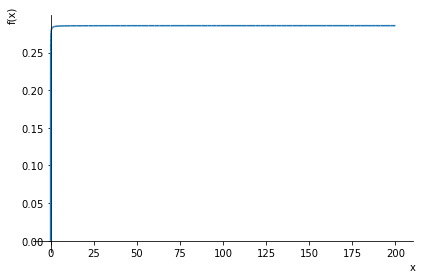

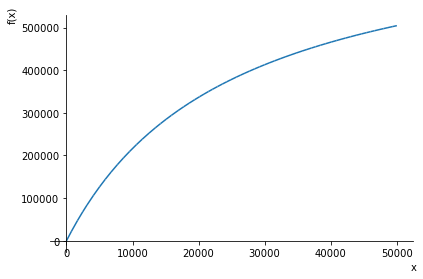

In [22]:
from sympy import *
from sympy.plotting import plot
init_printing()

# We can plot our return function
x = symbols('x')
expr = pool_amm.out_given_in_expr(wbtc, weth)
plot(expr, (x, 0, 200))
expr = pair_amm.out_given_in_expr(wbtc, weth)
plot(expr, (x, 0, 50000))

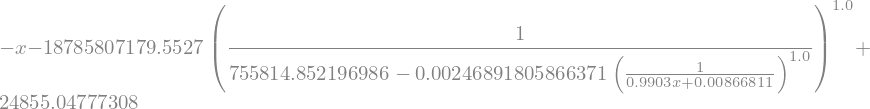

In [23]:
# How can we found if there is an arbitrage opertunity between ?
from Arbie.Actions.arbitrage import arbitrage_expr, arbitrage_diff_expr, TradeOpertunity

trade = TradeOpertunity([pool_amm, pair_amm], wbtc, weth)
arb_expr = arbitrage_expr(trade)
arb_expr

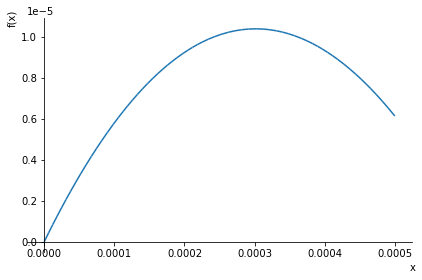

In [30]:
# If we plot we can clearly see that there seams to be some profit to be made!
plot(arb_expr, (x, 0, 0.0005))

In [27]:
from Arbie.Actions.arbitrage import find_arbitrage
find_arbitrage(trade)

ValueError: Could not find root within given tolerance. (1.0 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.